In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📄 Metadata Dataset: `pl_player_stats.csv`

| STT | `data-stat` (raw)           | Standardized column name           | Short description                           |
| --: | --------------------------- | ---------------------------------- | ------------------------------------------- |
| 1   | `Unnamed: 0_level_0_Squad`  | team                               | Team name                                    |
| 2   | `Unnamed: 1_level_0_# Pl`   | players_used                       | Number of players used                       |
| 3   | `Unnamed: 2_level_0_Age`    | avg_age                            | Average age (minutes-weighted)               |
| 4   | `Unnamed: 3_level_0_Poss`   | possession_pct                     | Possession (%)                               |
| 5   | `Playing Time_MP`           | matches_played                     | Matches played                               |
| 6   | `Playing Time_Starts`       | starts                             | Starts                                       |
| 7   | `Playing Time_Min`          | minutes_played                     | Total minutes played                         |
| 8   | `Playing Time_90s`          | minutes_90s                        | Minutes played (converted to 90s)            |
| 9   | `Performance_Gls`           | goals                              | Total goals                                  |
| 10  | `Performance_Ast`           | assists                            | Total assists                                |
| 11  | `Performance_G+A`           | goals_assists                      | Goals + assists                              |
| 12  | `Performance_G-PK`          | non_penalty_goals                  | Non-penalty goals                            |
| 13  | `Performance_PK`            | penalties_scored                   | Penalties scored                             |
| 14  | `Performance_PKatt`         | penalties_attempted                | Penalties attempted                          |
| 15  | `Performance_CrdY`          | yellow_cards                       | Yellow cards                                 |
| 16  | `Performance_CrdR`          | red_cards                          | Red cards                                    |
| 17  | `Expected_xG`               | xg                                 | Expected Goals (xG)                          |
| 18  | `Expected_npxG`             | npxg                               | Non-penalty xG                               |
| 19  | `Expected_xAG`              | xg_assist                          | Expected Assisted Goals (xAG)                |
| 20  | `Expected_npxG+xAG`         | npxg_plus_xg_assist                | npxG + xAG                                   |
| 21  | `Progression_PrgC`          | progressive_carries                | Progressive carries                          |
| 22  | `Progression_PrgP`          | progressive_passes                 | Progressive passes                           |
| 23  | `Per 90 Minutes_Gls`        | goals_per90                        | Goals per 90                                 |
| 24  | `Per 90 Minutes_Ast`        | assists_per90                      | Assists per 90                               |
| 25  | `Per 90 Minutes_G+A`        | goals_assists_per90                | Goals + assists per 90                       |
| 26  | `Per 90 Minutes_G-PK`       | non_penalty_goals_per90            | Non-penalty goals per 90                     |
| 27  | `Per 90 Minutes_G+A-PK`     | non_penalty_goals_assists_per90    | Non-penalty goals + assists per 90           |
| 28  | `Per 90 Minutes_xG`         | xg_per90                           | xG per 90                                    |
| 29  | `Per 90 Minutes_xAG`        | xg_assist_per90                    | xAG per 90                                   |
| 30  | `Per 90 Minutes_xG+xAG`     | xg_plus_xg_assist_per90            | xG + xAG per 90                              |
| 31  | `Per 90 Minutes_npxG`       | npxg_per90                         | npxG per 90                                  |
| 32  | `Per 90 Minutes_npxG+xAG`   | npxg_plus_xg_assist_per90          | npxG + xAG per 90                            |
| 33  | `Season`                    | season                             | Season                                       |
| 34  | `StatType`                  | stat_type                          | Stat type (Team / Opponent)                  |


#File backup

In [ ]:
df_s = df.copy()

#Data structures

In [ ]:
df_s.head().T

,0,1,2,3,4
team,Arsenal,Aston Villa,Bournemouth,Brentford,Brighton
players_used,24,23,24,21,25
avg_age,26.4,28.4,25.7,25.6,25.8
possession_pct,59.1,52.8,52.3,44.3,51.5
matches_played,16,16,15,16,16
starts,176,176,165,176,176
minutes_played,1440,1440,1350,1440,1440
minutes_90s,16.0,16.0,15.0,16.0,16.0
goals,28,24,21,22,24
assists,21,18,12,9,15


In [ ]:
df_s.columns

Index(['team', 'players_used', 'avg_age', 'possession_pct', 'matches_played',
       'starts', 'minutes_played', 'minutes_90s', 'goals', 'assists',
       'goals_assists', 'non_penalty_goals', 'penalties_scored',
       'penalties_attempted', 'yellow_cards', 'red_cards', 'xg', 'npxg',
       'xg_assist', 'npxg_plus_xg_assist', 'progressive_carries',
       'progressive_passes', 'goals_per90', 'assists_per90',
       'goals_assists_per90', 'non_penalty_goals_per90',
       'non_penalty_goals_assists_per90', 'xg_per90', 'xg_assist_per90',
       'xg_plus_xg_assist_per90', 'npxg_per90', 'npxg_plus_xg_assist_per90',
       'season', 'stat_type'],
      dtype='object')

In [ ]:
df_s.describe().T

,count,mean,std,min,25%,50%,75%,max
players_used,60.0,27.033333,3.817740,19.00,24.0000,26.500,30.0000,36.00
avg_age,60.0,26.406667,1.115358,23.70,25.7000,26.450,27.1000,28.40
possession_pct,60.0,50.015000,6.825993,35.80,44.3000,50.600,54.1000,65.20
matches_played,60.0,30.633333,10.507409,15.00,16.0000,38.000,38.0000,38.00
starts,60.0,336.966667,115.581502,165.00,176.0000,418.000,418.0000,418.00
minutes_played,60.0,2757.000000,945.666835,1350.00,1440.0000,3420.000,3420.0000,3420.00
minutes_90s,60.0,30.633333,10.507409,15.00,16.0000,38.000,38.0000,38.00
goals,60.0,45.133333,21.530795,8.00,24.0000,48.000,58.7500,94.00
assists,60.0,32.550000,16.866801,6.00,17.0000,34.500,44.0000,69.00
goals_assists,60.0,77.683333,38.192861,14.00,42.0000,82.500,102.0000,163.00


In [ ]:
df_s.dtypes

,0
team,object
players_used,int64
avg_age,float64
possession_pct,float64
matches_played,int64
starts,int64
minutes_played,int64
minutes_90s,float64
goals,int64
assists,int64


In [ ]:
df_s.isna().sum()

,0
team,0
players_used,0
avg_age,0
possession_pct,0
matches_played,0
starts,0
minutes_played,0
minutes_90s,0
goals,0
assists,0


In [ ]:
df_s.duplicated().sum()


np.int64(0)

In [ ]:
numeric_cols = df_s.select_dtypes(include="number").columns

(df_s[numeric_cols] < 0).sum()


,0
players_used,0
avg_age,0
possession_pct,0
matches_played,0
starts,0
minutes_played,0
minutes_90s,0
goals,0
assists,0
goals_assists,0


# Univariate analysis

In [ ]:
df_s["season"] = df_s["season"].astype("category")
df_s["season"] = df_s["season"].cat.set_categories(
    ["2023-2024", "2024-2025", "2025-2026"],
    ordered=True
)

df_s["season"].value_counts().sort_index()


,count
season,
2023-2024,20
2024-2025,20
2025-2026,20


In [ ]:
num_cols_core = [
    "possession_pct",
    "non_penalty_goals_per90",
    "npxg_per90",
    "xg_assist_per90",
    "npxg_plus_xg_assist_per90",
]

### Selected metrics (team-level)

- **`possession_pct`**: Captures a team’s **possession control and playing style** (dominant control vs transition-based play). As a **percentage**, it is comparable across seasons and less affected by differences in match counts.

- **`non_penalty_goals_per90`**: Measures **open-play scoring output** (excluding penalties). This reduces penalty-driven noise and better reflects a team’s more stable “true” scoring strength across seasons.

- **`npxg_per90`**: Measures **chance quality created** excluding penalties—useful for evaluating chance creation ability rather than raw goals (which can be influenced by finishing variance and luck).

- **`xg_assist_per90`**: Measures the **quality of chances created for teammates** (playmaking). It adds a creation-focused view beyond just final-shot outcomes.

- **`npxg_plus_xg_assist_per90`**: A **compact, sustainable attacking index**, combining self-created chances (`npxg`) and chances created for others (`xg_assist`). Useful for quickly comparing overall attacking strength and consistency across teams/seasons.


In [ ]:
df["progressive_passes_per90"]  = df["progressive_passes"]  / df["minutes_90s"]
df["progressive_carries_per90"] = df["progressive_carries"] / df["minutes_90s"]
df["yellow_cards_per90"]        = df["yellow_cards"]        / df["minutes_90s"]
df["red_cards_per90"]           = df["red_cards"]           / df["minutes_90s"]

num_cols_extra = [
    "progressive_passes_per90",
    "progressive_carries_per90",
    "yellow_cards_per90",
    "red_cards_per90",
]



### Additional metrics

- **`progressive_passes_per90`**: Measures how often a team **moves the ball forward via passing** (build-up, line-breaking). Per-90 normalization enables fair comparison across teams and seasons.

- **`progressive_carries_per90`**: Measures how often a team **progresses the ball via carries** (breaking lines, escaping pressure, driving into advanced areas). Using per 90 captures intensity rather than total accumulation.

- **`yellow_cards_per90`**: A proxy for **discipline and foul intensity**, often linked to defensive approach (aggressive pressing, tactical fouls). Per 90 avoids match-count bias.

- **`red_cards_per90`**: Captures **serious discipline risk** that can strongly affect results and stability. Per 90 makes comparisons fair across seasons with different numbers of matches.


In [ ]:
num_cols = num_cols_core + num_cols_extra
num_cols

['possession_pct',
 'non_penalty_goals_per90',
 'npxg_per90',
 'xg_assist_per90',
 'npxg_plus_xg_assist_per90',
 'progressive_passes_per90',
 'progressive_carries_per90',
 'yellow_cards_per90',
 'red_cards_per90']

In [ ]:
season_summary = (
    df
    .groupby("season")[num_cols]
    .agg(["mean", "median", "min", "max"])
    .round(3)
)

season_summary.T

season                            2023-2024  2024-2025  2025-2026
possession_pct            mean       50.005     49.995     50.045
                          median     49.750     49.500     51.150
                          min        35.800     40.600     41.400
                          max        65.200     61.300     60.400
non_penalty_goals_per90   mean        1.448      1.333      1.249
                          median      1.355      1.390      1.190
                          min         0.680      0.660      0.440
                          max         2.240      2.000      2.120
npxg_per90                mean        1.440      1.334      1.222
                          median      1.365      1.375      1.170
                          min         0.910      0.800      0.740
                          max         2.120      1.980      1.800
xg_assist_per90           mean        1.128      1.059      0.927
                          median      1.060      1.080      0.875
                          min         0.680      0.640      0.520
                          max         1.680      1.620      1.610
npxg_plus_xg_assist_per90 mean        2.568      2.394      2.145
                          median      2.435      2.460      2.055
                          min         1.590      1.460      1.260
                          max         3.790      3.600      3.400
progressive_passes_per90  mean       38.605     36.955     36.065
                          median     36.382     36.895     36.531
                          min        23.263     24.605     25.312
                          max        55.526     51.158     50.750
progressive_carries_per90 mean       18.812     18.753     16.772
                          median     18.895     18.645     17.000
                          min         9.105     12.789      9.625
                          max        29.658     30.158     26.500
yellow_cards_per90        mean        2.178      2.103      1.834
                          median      2.158      2.105      1.719
                          min         1.395      1.553      1.250
                          max         2.868      2.658      2.562
red_cards_per90           mean        0.076      0.068      0.057
                          median      0.079      0.066      0.031
                          min         0.000      0.000      0.000
                          max         0.184      0.158      0.250

* **2023–2024:** Possession stays broadly balanced (~50%), but this is the **most attack-heavy** season of the three (non-penalty goals, npxG, xG assist, and the combined attacking index are all highest). Progressive actions (passes/carries) and cards (yellow/red) are also higher—pointing to a faster tempo and stronger attacking output.

* **2024–2025:** Attacking metrics **ease slightly** versus 2023–2024 (non-penalty goals, npxG, xG assist, and the combined index all dip) while possession is largely unchanged. Progressive actions fall a bit and discipline improves (fewer yellow/red cards), suggesting a calmer, more stable overall profile.

* **2025–2026:** Possession remains around ~50%, but attacking output is **lowest** (non-penalty goals, npxG, xG assist, and the combined index). Progressive actions decline—especially carries—and average cards are lower. However, a higher max red-card rate (0.250) signals a discipline outlier, so the season looks generally less explosive with a few extreme cases.


## possession_pct

`possession_pct` is a team’s possession share (%), capturing playing style (control/dominance vs transition-based). Seasonal boxplots show how the league baseline shifts over time and which teams sit noticeably above or below the pack.


<Figure size 800x500 with 0 Axes>

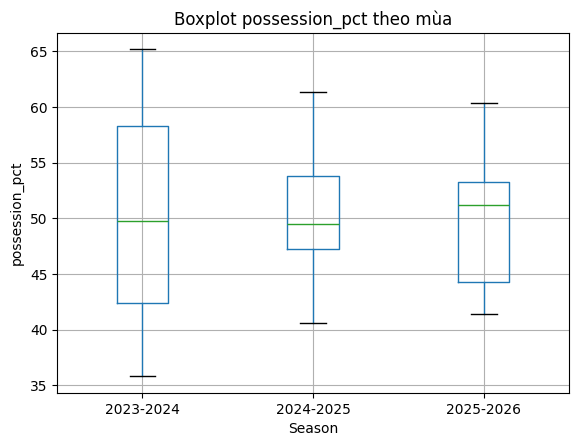

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="possession_pct", by="season")
plt.title("Boxplot possession_pct theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("possession_pct")
plt.show()


* **2023–2024:** Median ~49.8 (close to 50%), with a fairly wide IQR—indicating large stylistic differences in how teams approach possession. No clear outliers.

* **2024–2025:** Median ~49.5 (almost unchanged), but the IQR narrows noticeably—suggesting possession levels become more uniform across teams. No outliers.

* **2025–2026:** Median rises to ~51.1, implying a slightly higher possession baseline for the median team. The IQR widens again, showing greater variation has returned. No notable outliers.


## non_penalty_goals_per90

Non-penalty goals per 90 — a cleaner measure of scoring output that is typically more stable than total goals because it excludes penalties.


<Figure size 800x500 with 0 Axes>

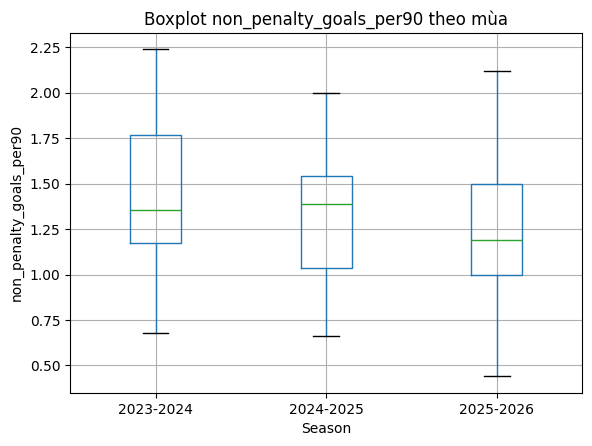

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="non_penalty_goals_per90", by="season")
plt.title("Boxplot non_penalty_goals_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("non_penalty_goals_per90")
plt.show()


* **2023–2024:** Median ~1.36, indicating a strong open-play scoring baseline. A wide IQR suggests clear separation between high- and low-scoring teams. No outliers.

* **2024–2025:** Median ~1.39 (slightly higher), with a narrower IQR—implying more consistent scoring levels across teams. No outliers.

* **2025–2026:** Median drops to ~1.19, showing a lower league-wide scoring baseline. The IQR is similar to 2024–2025, but the minimum is noticeably lower, meaning some teams struggle more in open-play scoring.


## npxg_per90

Non-penalty xG per 90 — measures chance quality created (excluding penalties), making it a good indicator of sustainable attacking strength over time.


<Figure size 800x500 with 0 Axes>

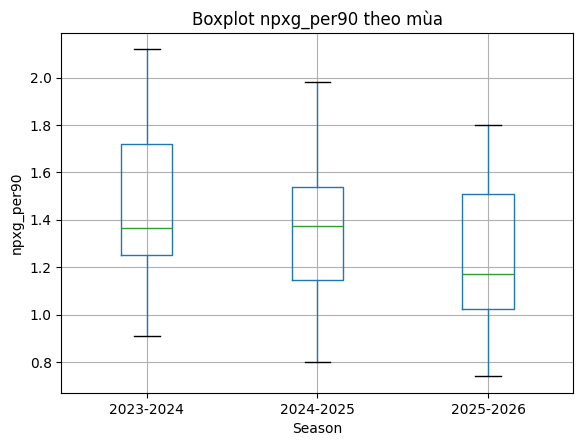

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="npxg_per90", by="season")
plt.title("Boxplot npxg_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("npxg_per90")
plt.show()


* **2023–2024:** Median ~1.37, indicating strong chance quality overall. A wide IQR suggests large gaps between teams in chance creation. No outliers.

* **2024–2025:** Median ~1.38 (virtually unchanged), with a slightly narrower IQR—implying chance creation becomes a bit more uniform across teams. No outliers.

* **2025–2026:** Median drops clearly (~1.17). The IQR is similar to 2024–2025 but shifted lower in absolute terms, indicating a weaker league-wide chance-creation baseline. No notable outliers.


## xg_assist_per90

xG Assist per 90 — measures the quality of chances created for teammates (playmaking), adding a chance-creation perspective beyond finishing.


<Figure size 800x500 with 0 Axes>

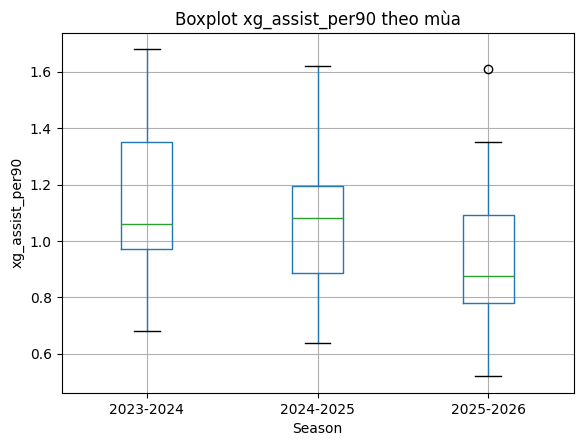

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="xg_assist_per90", by="season")
plt.title("Boxplot xg_assist_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("xg_assist_per90")
plt.show()


* **2023–2024:** Median ~1.06, indicating solid chance creation for teammates. The IQR is moderate, and there are no clear outliers.

* **2024–2025:** Median rises slightly to ~1.08, with a similar IQR—suggesting playmaking remains stable across teams. No outliers.

* **2025–2026:** Median drops sharply (~0.88). The IQR tightens, but a single upper outlier appears, indicating one team creates chances at a clearly higher level than the rest.


## npxg_plus_xg_assist_per90

(npxG + xG Assist) per 90 — a combined attacking index that merges self-created chance quality and chance creation for teammates, making it a strong single metric for comparing overall attacking strength across seasons.


<Figure size 800x500 with 0 Axes>

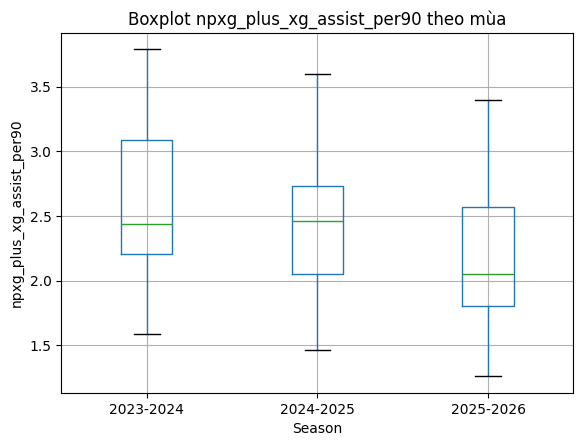

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="npxg_plus_xg_assist_per90", by="season")
plt.title("Boxplot npxg_plus_xg_assist_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("npxg_plus_xg_assist_per90")
plt.show()


* **2023–2024:** Median ~2.44, indicating a strong combined attacking baseline. A wide IQR shows clear separation between teams in overall attacking strength. No outliers.

* **2024–2025:** Median ~2.46 (almost unchanged), with a slightly narrower IQR—suggesting teams are closer together in attacking output. No outliers.

* **2025–2026:** Median drops to ~2.05, pointing to a weaker attacking baseline. The IQR remains fairly wide, and while there are no outliers, the maximum is lower than in previous seasons—implying fewer extreme high-performing attacks.


## progressive_passes_per90

Progressive passes per 90 — the number of forward, line-breaking passes that move the ball meaningfully upfield, capturing build-up and progression through passing.



<Figure size 800x500 with 0 Axes>

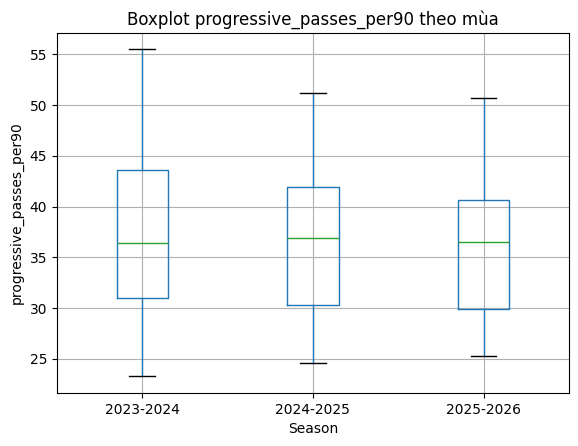

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="progressive_passes_per90", by="season")
plt.title("Boxplot progressive_passes_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("progressive_passes_per90")
plt.show()


* **2023–2024:** Median ~36.4, with a wide IQR—showing large differences between teams in passing-based progression. No outliers.

* **2024–2025:** Median ~36.9 (stable), and the IQR tightens—suggesting teams become more similar in how often they progress via passing. No outliers.

* **2025–2026:** Median ~36.5 (still stable), with an IQR close to 2024–2025—indicating a consistent league baseline and no notable outliers.


## progressive_carries_per90

Progressive carries per 90 — the number of carries that move the ball meaningfully forward, reflecting a team’s ability to break lines or escape pressure through ball-carrying.


<Figure size 800x500 with 0 Axes>

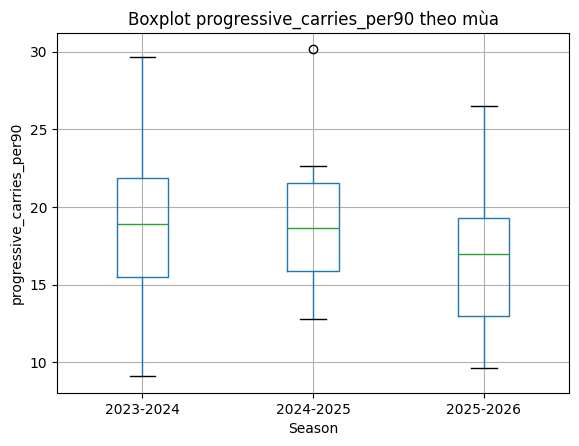

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="progressive_carries_per90", by="season")
plt.title("Boxplot progressive_carries_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("progressive_carries_per90")
plt.show()


* **2023–2024:** Median ~18.9, with a fairly wide IQR—indicating large differences in progressive carrying across teams. No outliers.

* **2024–2025:** Median ~~18.7 (similar), with a comparable IQR, but a clear upper outlier (~30) appears—suggesting one team is exceptionally carry-heavy.

* **2025–2026:** Median drops to ~17.0 and the IQR tightens, pointing to lower and more uniform progressive carrying. No notable outliers.


## yellow_cards_per90

Yellow cards per 90 — a proxy for discipline and duel intensity (often linked to defensive/pressing style). Per-90 normalization makes comparisons fair across seasons.


<Figure size 800x500 with 0 Axes>

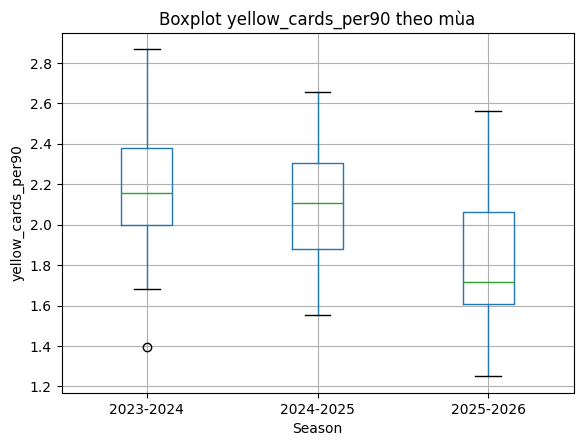

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="yellow_cards_per90", by="season")
plt.title("Boxplot yellow_cards_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("yellow_cards_per90")
plt.show()


* **2023–2024:** Median ~2.16 with a moderate IQR. One lower outlier suggests a team with unusually strong discipline (very few yellows).

* **2024–2025:** Median edges down to ~2.10, with a similar IQR—overall discipline looks broadly stable. No clear outliers.

* **2025–2026:** Median drops sharply (~1.72) and the IQR tightens, indicating fewer yellow cards and more uniform discipline across teams. No outliers.


## red_cards_per90

Red cards per 90 — a proxy for severe discipline risk (sometimes linked to aggressive defending/pressing). Using per 90 enables fair comparisons across seasons.


<Figure size 800x500 with 0 Axes>

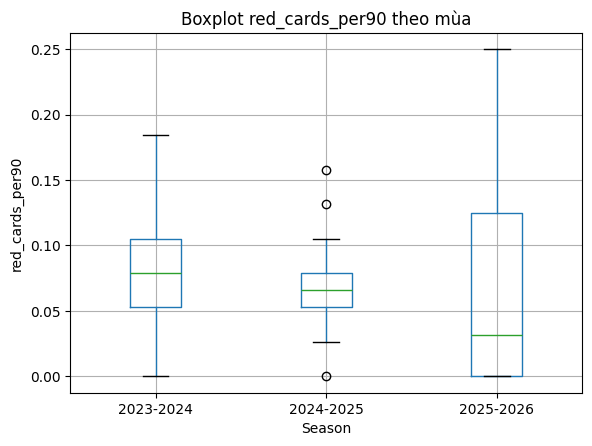

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column="red_cards_per90", by="season")
plt.title("Boxplot red_cards_per90 theo mùa")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("red_cards_per90")
plt.show()


* **2023–2024:** Median ~0.08 with a small IQR, indicating red cards are generally rare and fairly consistent across teams. No notable outliers.

* **2024–2025:** Median ~0.07 with a small IQR, but a few upper outliers appear—suggesting some teams receive unusually many red cards.

* **2025–2026:** Median drops sharply (~~0.03). The spread is relatively wider and a clear upper outlier (~0.25) emerges, indicating at least one team has a serious discipline issue.


In [ ]:
num_cols = [
    "possession_pct",
    "non_penalty_goals_per90",
    "npxg_per90",
    "xg_assist_per90",
    "npxg_plus_xg_assist_per90",
    "progressive_passes_per90",
    "progressive_carries_per90",
    "yellow_cards_per90",
    "red_cards_per90",
]


In [ ]:
team_summary = (
    df
    .groupby("team")[num_cols]
    .agg(["mean"])
    .round(3)
)

# flatten columns
team_summary.columns = [f"{c}_{stat}" for c, stat in team_summary.columns]
team_summary


,possession_pct_mean,non_penalty_goals_per90_mean,npxg_per90_mean,xg_assist_per90_mean,npxg_plus_xg_assist_per90_mean,progressive_passes_per90_mean,progressive_carries_per90_mean,yellow_cards_per90_mean,red_cards_per90_mean
team,,,,,,,,,
Arsenal,58.067,1.777,1.633,1.247,2.880,49.533,21.634,1.592,0.070
Aston Villa,52.133,1.560,1.327,1.073,2.400,36.580,18.052,1.991,0.073
Bournemouth,48.400,1.310,1.393,1.003,2.397,37.654,19.167,2.388,0.075
Brentford,45.800,1.327,1.320,1.013,2.333,32.024,13.655,1.950,0.026
Brighton,54.533,1.350,1.403,1.083,2.493,41.489,21.445,2.286,0.053
Burnley,44.400,0.985,0.910,0.700,1.610,28.196,14.378,1.794,0.155
Chelsea,58.033,1.610,1.673,1.363,3.037,41.595,22.086,2.488,0.136
Crystal Palace,42.467,1.193,1.400,1.097,2.493,30.640,13.100,1.905,0.053
Everton,42.000,0.990,1.197,0.930,2.127,30.181,13.459,2.126,0.047


## Team-level attacking profiles (aggregated across seasons)

### 1) Elite, well-rounded attacks
- **Manchester City**: Top `non_penalty_goals_per90` (2.05), very high `npxg_plus_xg_assist_per90` (3.343), high possession (61.27), and the highest `progressive_carries_per90` (28.77) → dominant control + sustainable chance creation.
- **Liverpool**: Highest `npxg_plus_xg_assist_per90` (3.410), with both `npxg_per90` and `xg_assist_per90` very strong → balanced finishing + creation.
- **Arsenal**: High possession (58.07), strong `npxg_plus_xg_assist_per90` (2.880), and elite `progressive_passes_per90` (~49.5) → controlled, consistent attacking output.

### 2) Strong attacks with a clear identity
- **Chelsea**: High `npxg_plus_xg_assist_per90` (3.037) and very high `xg_assist_per90` (1.363) → strong creation, but higher card rates → discipline risk.
- **Newcastle Utd, Tottenham**: Attacking metrics above league average with solid progression → effective, but not quite at elite separation.
- **Brighton**: Strong combined attack (`npxg_plus_xg_assist_per90` 2.493) with high progressive actions → build-up and chance creation emphasis.

### 3) Mid-table, balanced profiles
- **Aston Villa, Fulham, Manchester Utd, Crystal Palace, Bournemouth**: Most metrics sit near the median → broadly balanced, performance can swing by season/form.
- **Brentford, Nott’ham Forest, West Ham**: Mid-to-lower attacking/progression levels → fewer consistent advantages.

### 4) Attack-limited teams
- **Sheffield Utd, Sunderland, Southampton, Leicester City, Ipswich Town**: Low `non_penalty_goals_per90`, `npxg_per90`, and `npxg_plus_xg_assist_per90` → limited creation and conversion, weaker progression.
- **Burnley**: Near the bottom on combined attacking metrics → core issue is attacking capacity rather than discipline.

### 5) Progression (progressive actions)
- **Manchester City, Liverpool, Arsenal, Chelsea** lead in both `progressive_passes_per90` and `progressive_carries_per90` → strong ability to advance play and sustain pressure.
- Bottom groups tend to have low progressive actions → harder to create chances consistently.

### 6) Discipline notes
- **Chelsea, Ipswich Town, Sheffield Utd, Sunderland** show higher `yellow_cards_per90` and/or `red_cards_per90` → higher stability risk.
- **Manchester City, Arsenal, Leeds, Leicester** have low average red-card rates → relatively good discipline.

### Consolidated takeaway
- **Manchester City, Liverpool, Arsenal** are the most complete attacking teams across the three-season sample.
- **Chelsea, Newcastle, Tottenham, Brighton** sit above average with clear identities but less consistent separation.
- Lower-tier teams struggle primarily with chance creation and progression, driving persistently low attacking output.


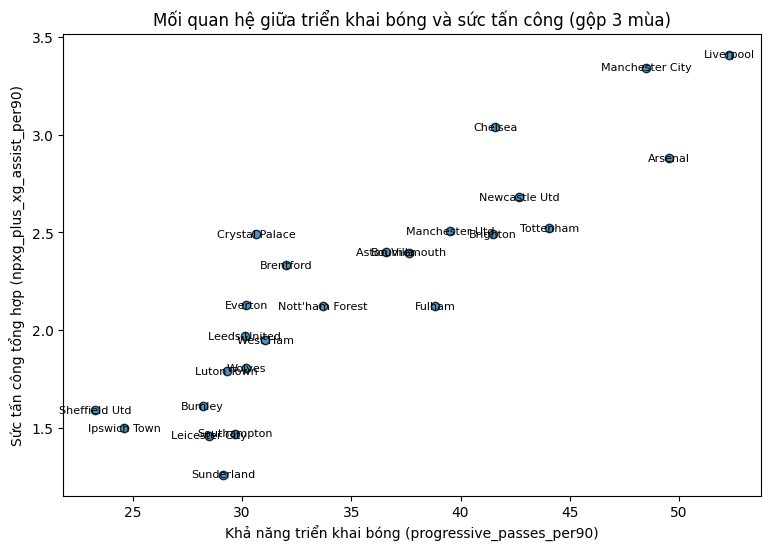

In [ ]:
plt.figure(figsize=(9, 6))

plt.scatter(
    team_summary["progressive_passes_per90_mean"],
    team_summary["npxg_plus_xg_assist_per90_mean"],
    alpha=0.8,
    edgecolors="black"
)

# Label each team (team is the index)
for team, row in team_summary.iterrows():
    plt.text(
        row["progressive_passes_per90_mean"],
        row["npxg_plus_xg_assist_per90_mean"],
        team,
        fontsize=8,
        ha="center",
        va="center"
    )

plt.xlabel("Build-up progression (progressive_passes_per90)")
plt.ylabel("Combined attacking strength (npxg_plus_xg_assist_per90)")
plt.title("Build-up progression vs. attacking strength (3-season aggregate)")

plt.show()


### 1) Overall pattern
There is a clear **positive relationship**: teams with higher `progressive_passes_per90` tend to have higher `npxg_plus_xg_assist_per90`, linking build-up progression to sustainable chance creation.

### 2) Elite cluster (upper-right)
**Manchester City, Liverpool, Arsenal** sit in the upper-right, combining top-tier progression with outstanding attacking strength—consistent with teams that impose games and turn build-up into high-quality chances.

### 3) Strong build-up, not fully elite output
**Chelsea, Newcastle Utd, Tottenham, Brighton** show high-to-good progression but only above-average attacking totals, suggesting decent build-up with **less complete conversion into end-product** than the elite.

### 4) Middle-of-the-pack profiles
**Aston Villa, Bournemouth, Fulham, Crystal Palace** cluster near the center: both progression and attacking strength are around league average—balanced, but rarely dominant.

### 5) Low progression + low attack (lower-left)
**Sheffield Utd, Ipswich Town, Sunderland, Leicester City, Burnley** concentrate in the lower-left, indicating difficulty advancing the ball and generating quality chances.

### 6) Notable notes
- **Chelsea** produces relatively strong attack for its level of progression.
- **Brighton** and **Tottenham** sit close together: clear build-up identity, but only solid (not elite) attacking output.

### 7) Takeaway
Build-up progression is a strong **foundation** for attacking strength, but **not sufficient** on its own—only teams that also optimize chance creation (e.g., City/Liverpool/Arsenal) separate clearly at the top.
